### 第一种使用decoration的方式：

In [138]:
def fib(n):
    if n==0 or n==1:
        return n
    else:
        return fib(n-1)+fib(n-2)

In [130]:
def count(f):
        def counted(*args,**kwargs):
            counted.call_count += 1
            return f(*args,**kwargs)
        counted.call_count = 0
        return counted

In [131]:
fib=count(fib)

In [132]:
fib(5)

5

In [133]:
fib.call_count

15

In [134]:
fib(5)

5

In [135]:
fib.call_count

30

### 第二种使用decoration的方法

In [130]:
def count(f):
        def counted(*args,**kwargs):
            counted.call_count += 1
            return f(*args,**kwargs)
        counted.call_count = 0
        return counted

In [139]:
@count
def fib(n):
    if n==0 or n==1:
        return n
    else:
        return fib(n-1)+fib(n-2)

In [140]:
fib(5)

5

In [141]:
fib.call_count

15

In [142]:
fib(5)

5

In [143]:
fib.call_count

30

### p_decorate的例子

In [87]:
def p_decorate(func):
   def func_wrapper(*args,**kwargs):
       return "<p>{0}</p>".format(func(*args,**kwargs))
   return func_wrapper

class Person:
    def __init__(self):
        self.name = "John"
        self.family = "Doe"

    @p_decorate
    def get_fullname(self):
        return self.name+" "+self.family

In [88]:
my_person = Person()

In [89]:
print(my_person.get_fullname())

<p>John Doe</p>


In [118]:
def tag(tag_name):
    """Create a tag decorator"""
    def tag_decorator(func):
        """Specify a decorator"""
        def helper(*args,**kwargs):
            """a helper function"""
            return "{0}{1}{0}".format(tag_name,func(*args,**kwargs))
        return helper
    return tag_decorator

In [119]:
smile_decorator = tag(' :) ')

In [120]:
def get_text(name):
    return "{0} is awesome!".format(name)

In [121]:
decorated_get_text = smile_decorator(get_text)
decorated_get_text('Junyu Guo')

' :) Junyu Guo is awesome! :) '

In [122]:
#或者可以用@

In [123]:
@tag(' :) ')
def get_text(name):
    return "{0} is awesome!".format(name)
get_text('Rainy')

' :) Rainy is awesome! :) '

In [124]:
get_text.__name__

'helper'

In [125]:
get_text.__module__

'__main__'

In [126]:
get_text.__doc__

'a helper function'

##### 解决办法：

In [129]:
from functools import wraps

def tags(tag_name):
    def tags_decorator(func):
        @wraps(func)
        def func_wrapper(name):
            return "<{0}>{1}</{0}>".format(tag_name, func(name))
        return func_wrapper
    return tags_decorator

@tags("p")
def get_text(name):
    """returns some text"""
    return "Hello "+name

print (get_text.__name__)# get_text
print (get_text.__doc__) # returns some text
print (get_text.__module__) # __main__

get_text
returns some text
__main__


### Memorization (used to spped up the program)

In [202]:
def memo(f):
    cache={}   #Keys are arguments that maps to return values
    def memorized(n):
        if n not in cache:
            cache[n]=f(n)
        return cache[n]
    return memorized  #Same behavior as f, if f is a pure function

In [203]:
def count(f):
        def counted(*args,**kwargs):
            counted.call_count += 1
            return f(*args,**kwargs)
        counted.call_count = 0
        return counted

In [239]:
def fib(n):
    if n==0 or n==1:
        return n
    else:
        return fib(n-1)+fib(n-2)

In [205]:
fib = count(fib)
counted_fib = fib
fib = memo(fib)
fib = count(fib)
fib(30)

832040

In [206]:
fib.call_count

59

In [207]:
counted_fib.call_count

31

### Space

In [242]:
fib(10)

55

In [239]:
def fib(n):
    if n==0 or n==1:
        return n
    else:
        return fib(n-1)+fib(n-2)

In [233]:
def count_frames(f):
    """Return a counted version of f with a max_count attribute.

    >>> def fib(n):
    ...     if n == 0 or n == 1:
    ...         return n
    ...     else:
    ...         return fib(n-2) + fib(n-1)
    >>> fib = count_frames(fib)
    >>> fib(20)
    6765
    >>> fib.open_count
    0
    >>> fib.max_count
    20
    >>> fib(25)
    75025
    >>> fib.max_count
    25
    """
    def counted(n):
        counted.open_count += 1
        counted.max_count = max(counted.max_count, counted.open_count)
        result = f(n)
        counted.open_count -= 1
        return result
    counted.open_count = 0
    counted.max_count = 0
    return counted

In [251]:
fib = count_frames(fib)

In [252]:
fib(5)

5

In [253]:
fib.open_frame

0

In [254]:
fib.max_frame

5

In [255]:
from math import sqrt

def divides(k,n):
    """Return whether k evenly divides n."""
    return n%k == 0

def factors(n):
    """Count the positive integers that evenly divide n."""
    total = 0
    for k in range(1,n+1):
        if divides(k,n):
            total+=1
    return total

def factors_fast(n):
    total=0
    k=1
    square_n = sqrt(n)
    while k< square_n:
        if divides(k,n):
            total+=2
        k+=1
    if k*k == n:
        total+=1
    return total

In [290]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from timeit import repeat
from numpy import median, percentile

def plot_times(name,xs,n=25,order=None):
    f = lambda x: name + '(' + str(x) + ')'
    g = globals()
    
    samples = []
    for _ in range(n):
        times = lambda x: repeat(f(x), globals=g, number=1,repeat=n)
        samples.append([median(times(x)) for x in xs])
        ys = [10e6 * median(sample) for sample in zip(*samples)]
        
        plt.figure(figsize=(8,8))
        plt.plot(xs,ys)
        
        if order:
            slopes = [y/order(x) for (x,y) in zip(xs,ys)]
            for slope in (percentile(slopes,0.2), percentile(slopes,99.8)):
                plt.plot(xs,[slope*order(x) for x in xs],linewidth=3)

In [291]:
args = range(20,100)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


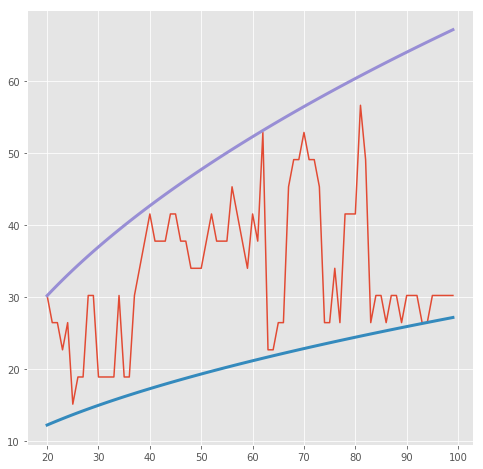

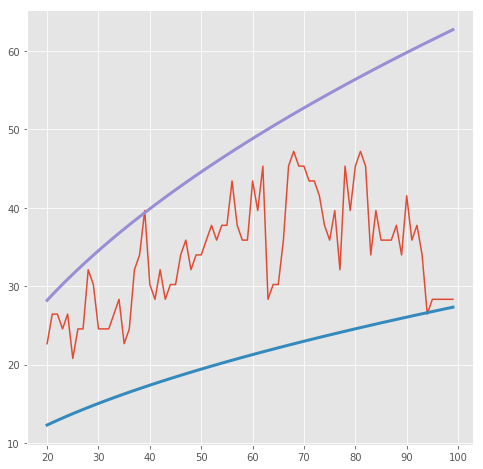

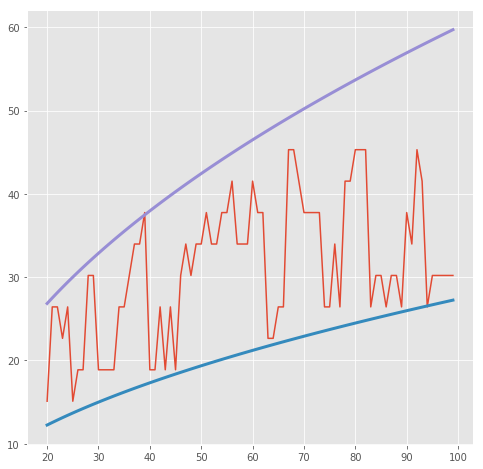

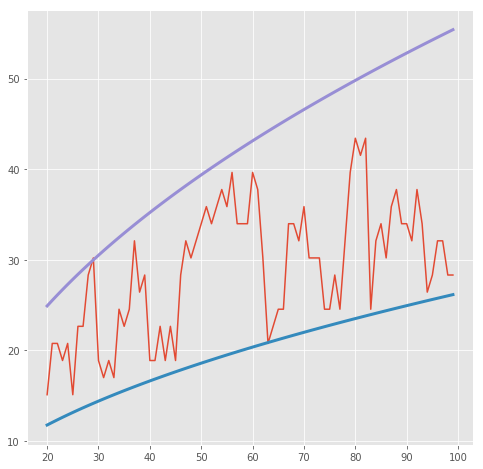

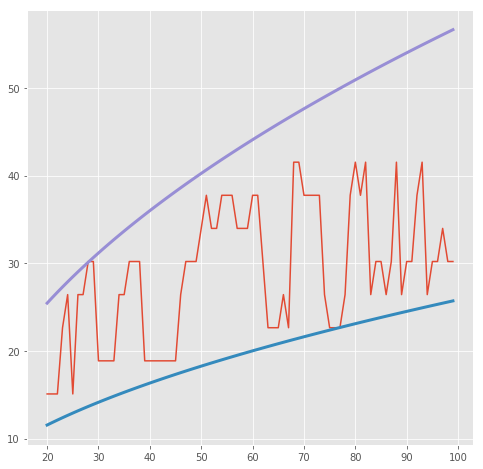

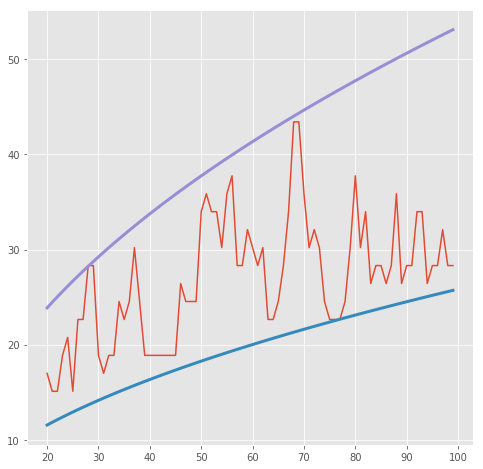

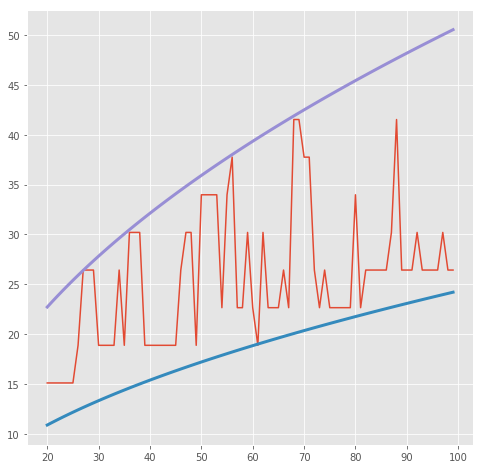

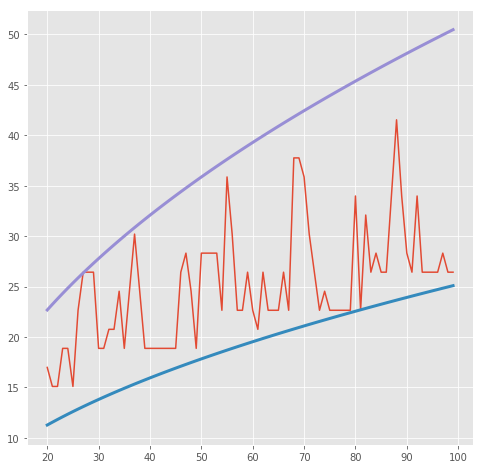

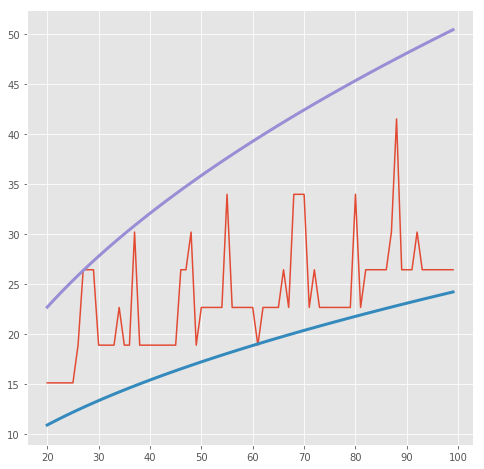

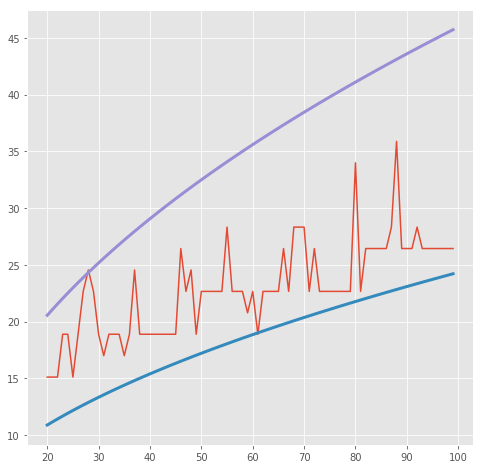

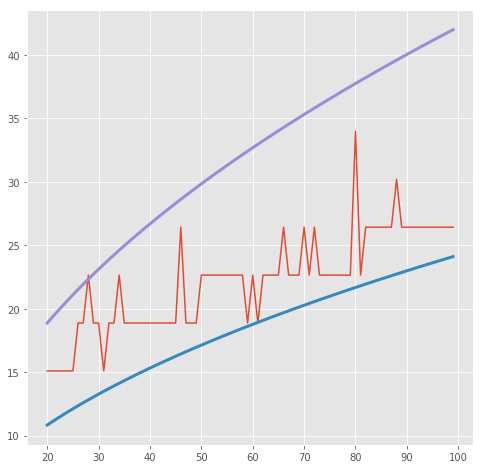

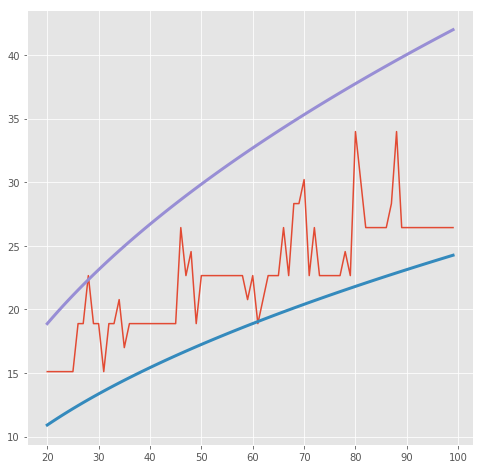

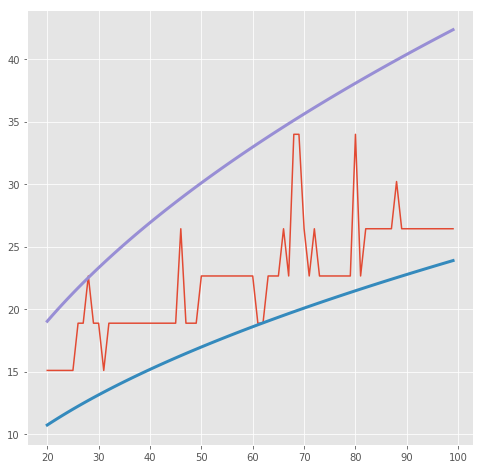

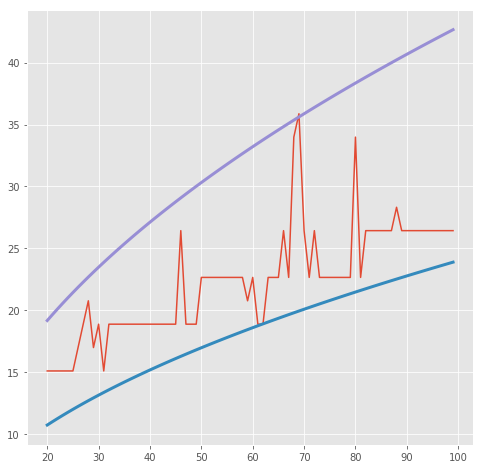

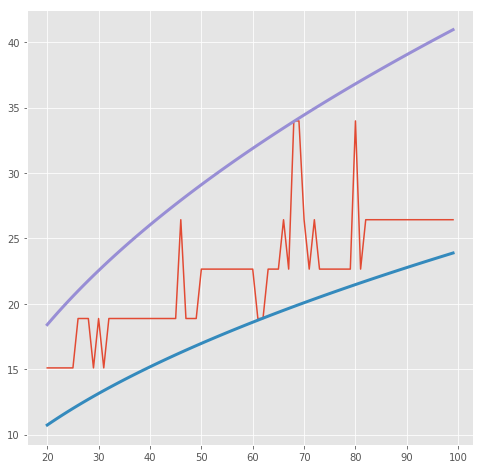

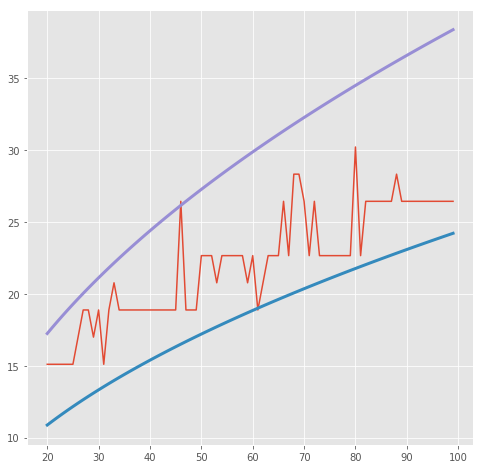

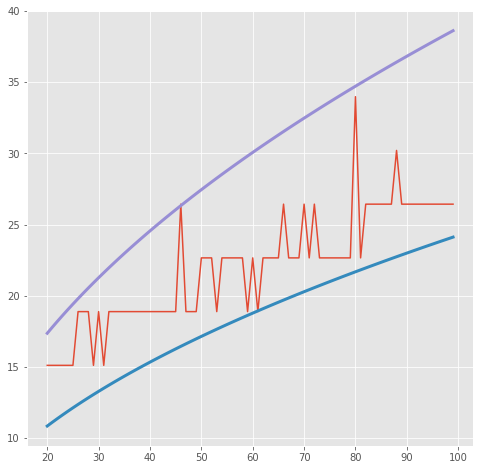

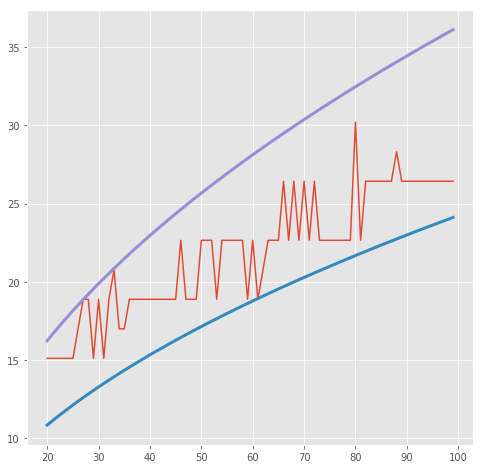

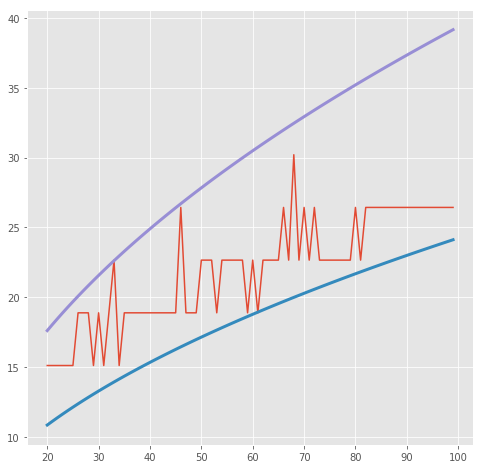

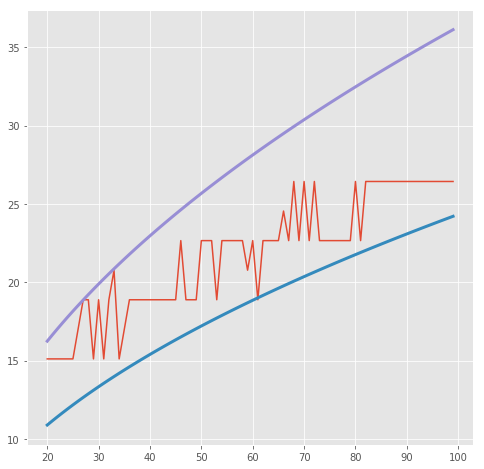

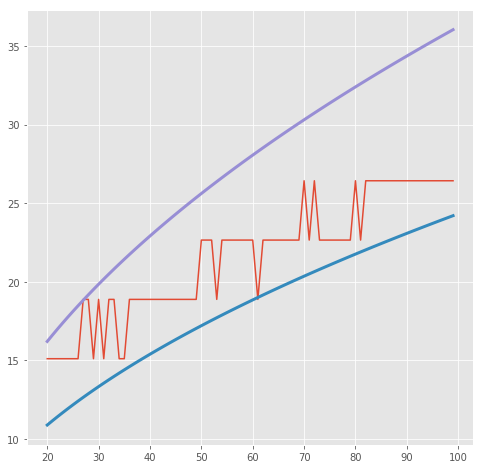

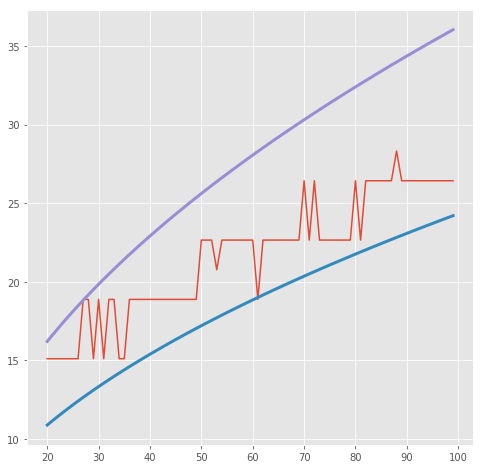

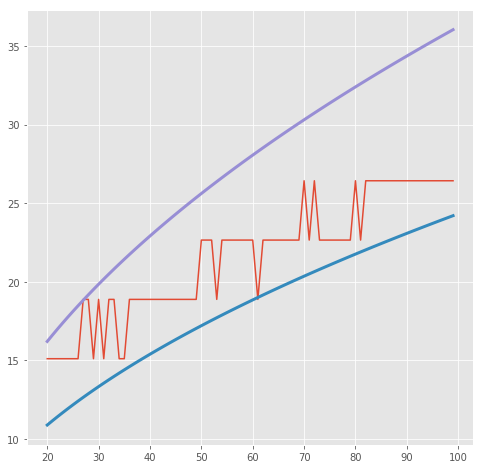

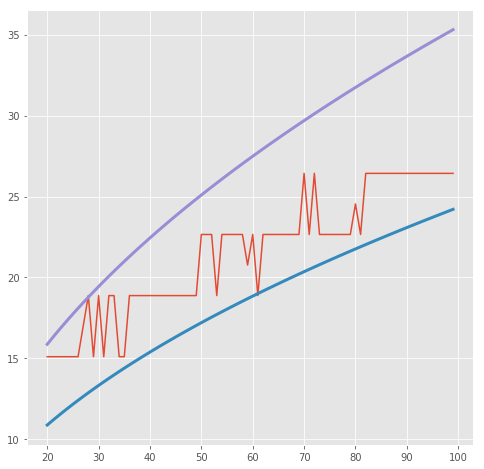

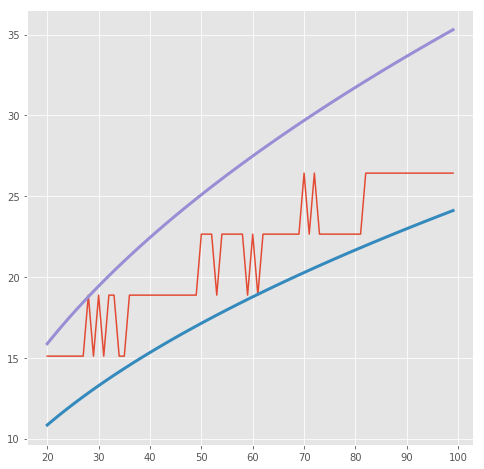

In [295]:
plot_times('factors_fast',args,order = sqrt)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


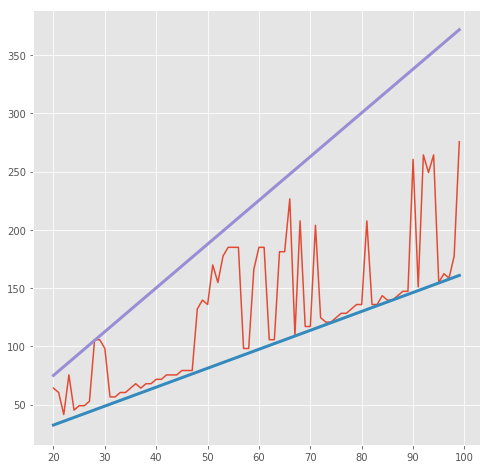

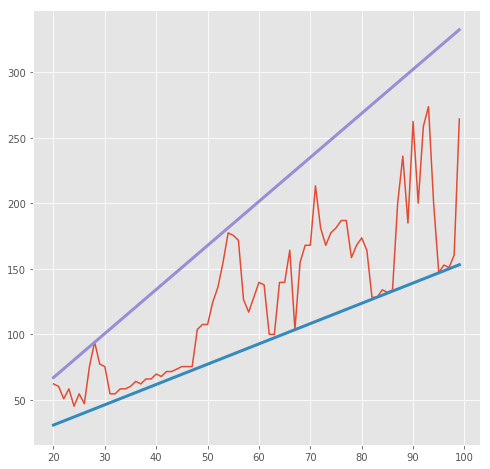

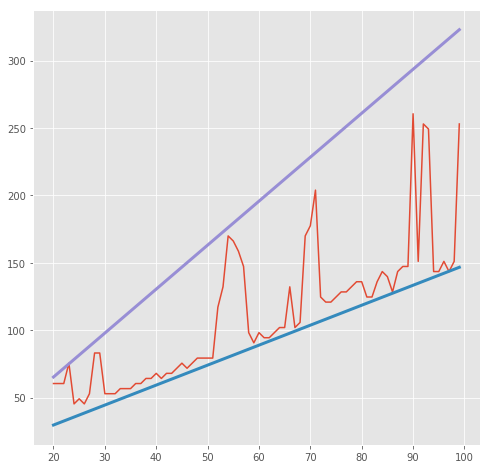

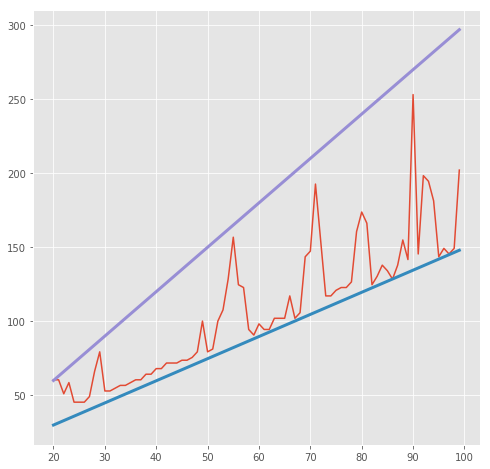

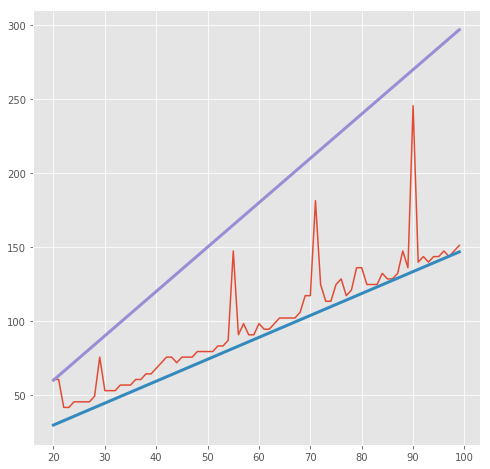

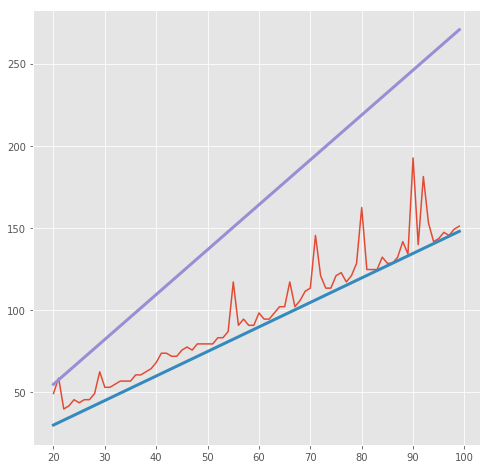

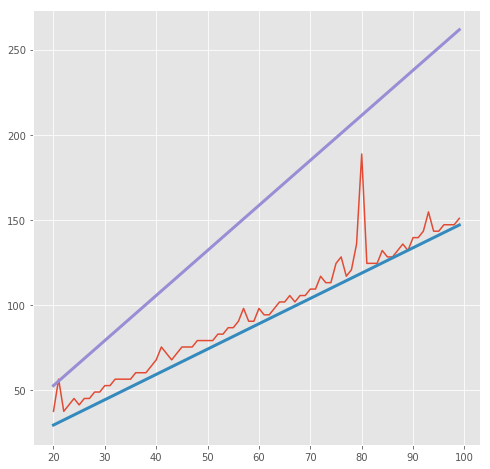

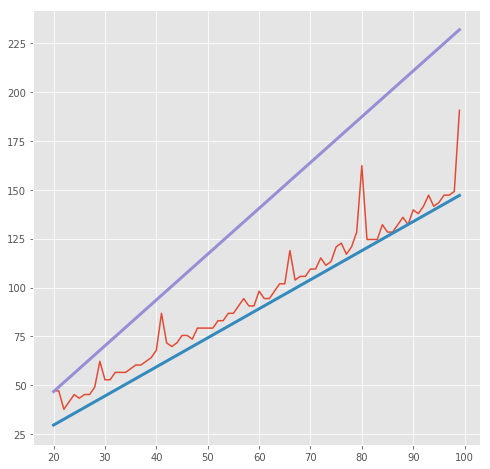

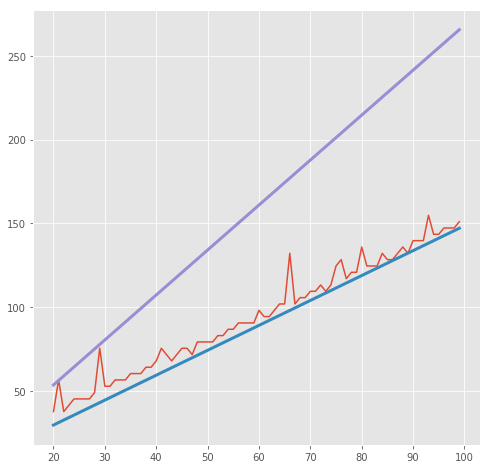

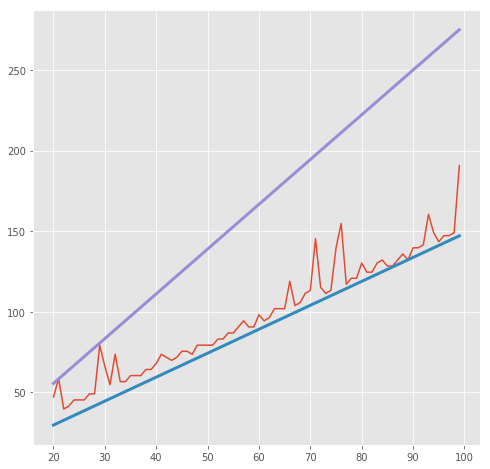

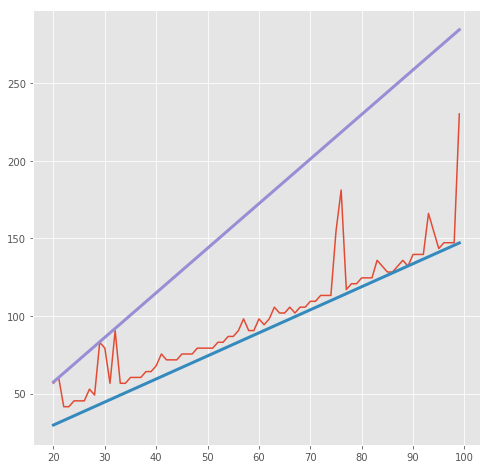

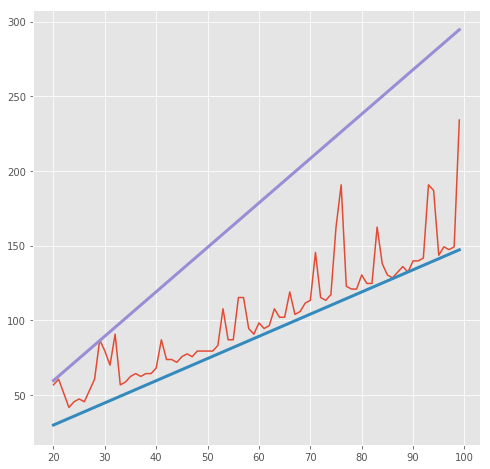

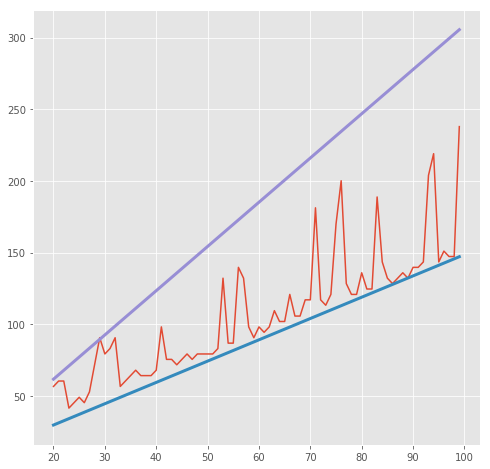

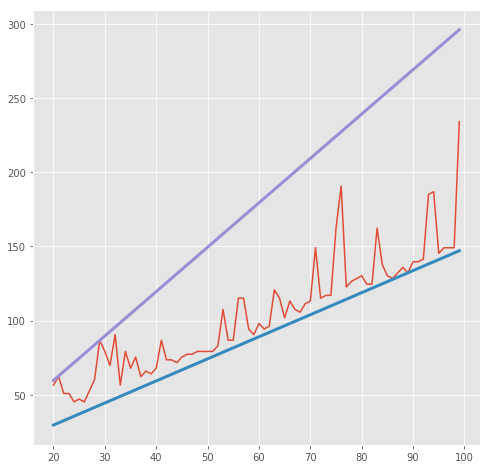

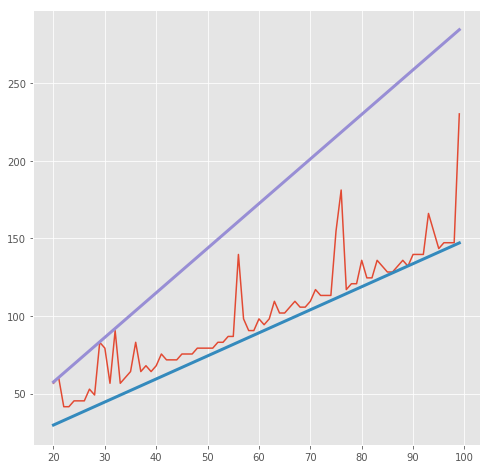

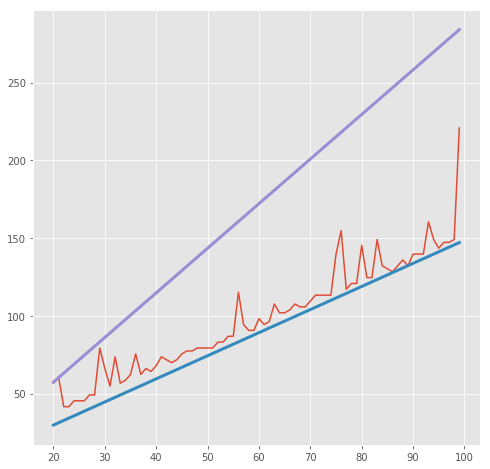

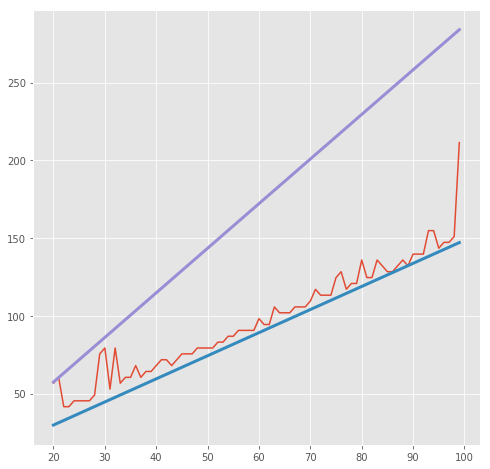

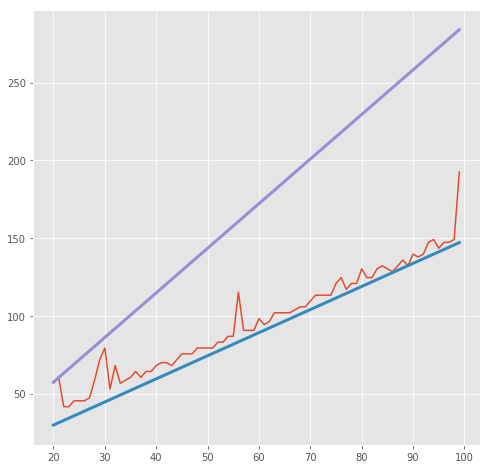

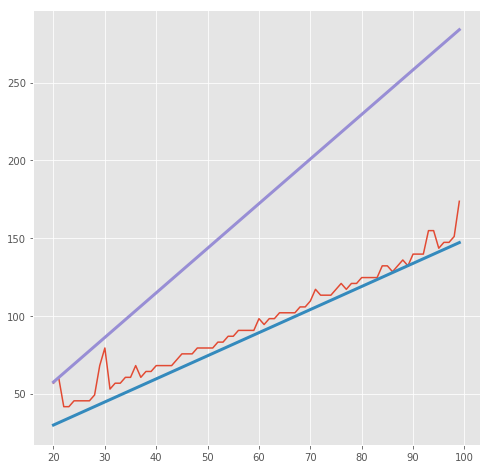

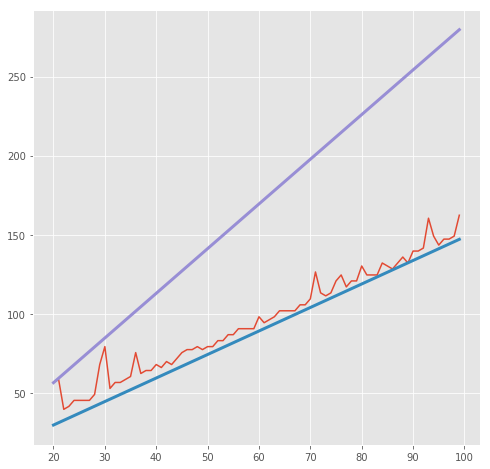

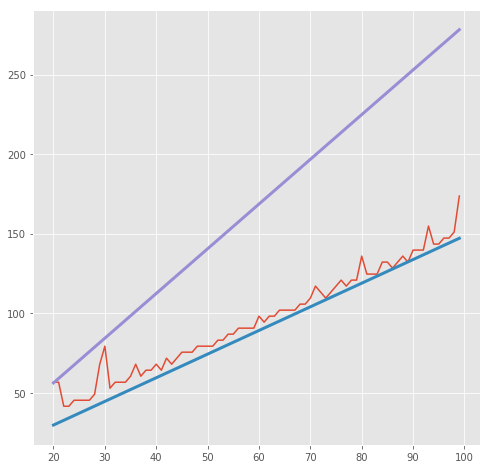

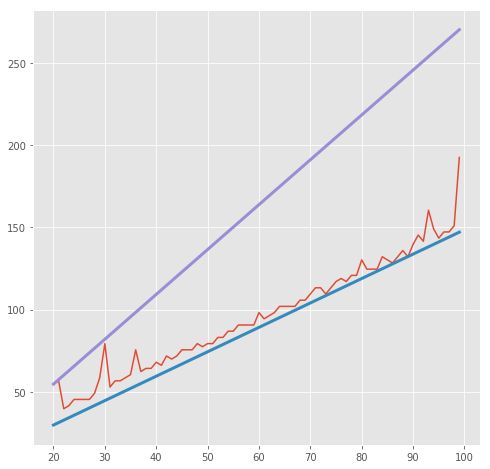

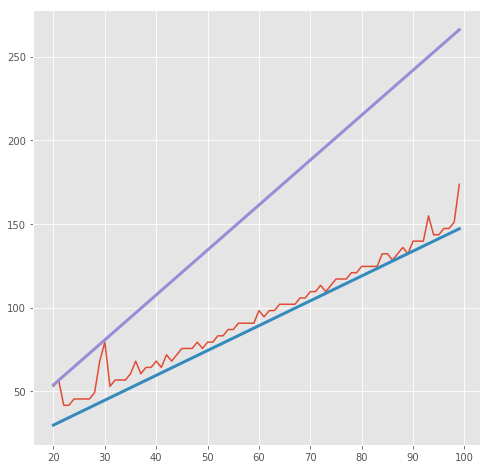

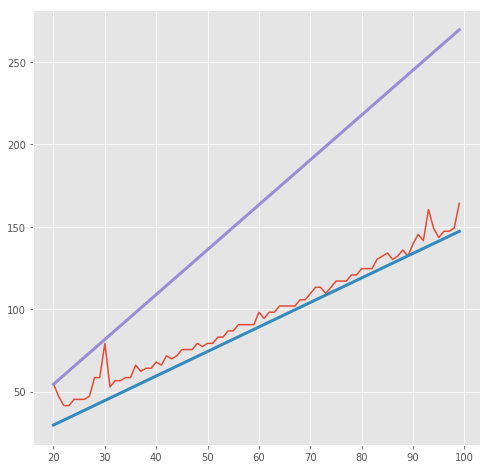

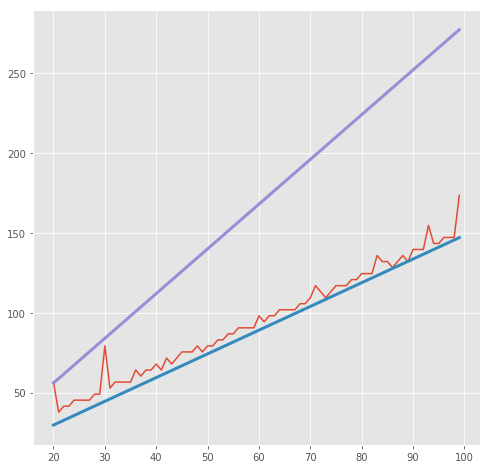

In [296]:
plot_times('factors',args,order = lambda x:x)

## Exponential

In [331]:
from ucb import *

In [332]:
@trace
def exp(b,n):
    if n==0:
        return 1
    else:
        return b*exp(b,n-1)

In [333]:
def square(x):
    return x*x

@trace
def exp_fast(b,n):
    if n==0:
        return 1
    elif n%2==0:
        return square(exp(b,n//2))
    else:
        return b*exp_fast(b,n-1)

In [334]:
exp(2,10)

exp(2, 10):
    exp(2, 9):
        exp(2, 8):
            exp(2, 7):
                exp(2, 6):
                    exp(2, 5):
                        exp(2, 4):
                            exp(2, 3):
                                exp(2, 2):
                                    exp(2, 1):
                                        exp(2, 0):
                                        exp(2, 0) -> 1
                                    exp(2, 1) -> 2
                                exp(2, 2) -> 4
                            exp(2, 3) -> 8
                        exp(2, 4) -> 16
                    exp(2, 5) -> 32
                exp(2, 6) -> 64
            exp(2, 7) -> 128
        exp(2, 8) -> 256
    exp(2, 9) -> 512
exp(2, 10) -> 1024


1024

In [335]:
exp_fast(2,10)

exp_fast(2, 10):
    exp(2, 5):
        exp(2, 4):
            exp(2, 3):
                exp(2, 2):
                    exp(2, 1):
                        exp(2, 0):
                        exp(2, 0) -> 1
                    exp(2, 1) -> 2
                exp(2, 2) -> 4
            exp(2, 3) -> 8
        exp(2, 4) -> 16
    exp(2, 5) -> 32
exp_fast(2, 10) -> 1024


1024

In [392]:
class Fib():
    """A Fibonacci number.

    >>> start = Fib()
    >>> start
    0
    >>> start.next()
    1
    >>> start.next().next()
    1
    >>> start.next().next().next()
    2
    >>> start.next().next().next().next()
    3
    >>> start.next().next().next().next().next()
    5
    >>> start.next().next().next().next().next().next()
    8
    >>> start.next().next().next().next().next().next() # Ensure start isn't changed
    8
    """

    def __init__(self, value=0):
        self.value = value

    def next(self):
        if self.value == 0:
            result = Fib(1)
        else:
            result=Fib(self.previous+self.value) #先不要return,先用result把instance存起来
        result.previous = self.value
        return result
    
    def __repr__(self):
        return str(self.value)

In [393]:
fib = Fib()

In [394]:
fib

0

In [395]:
fib.next()

1

In [396]:
fib.next().next()

1

In [397]:
fib.next().next().next()

2

In [398]:
fib.next().next().next().next()

3